In [1]:
import pandas as pd
import os, json
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cards_df = pd.read_csv(os.path.join('data', 'dokkan_cards.csv'))
pettan_df = pd.read_csv(os.path.join('data', 'pettan_cards.csv'))

In [3]:
cards_df.head()

,Title,Character,Max Level,SA Level,Rarity,Type,Cost,ID,JP Release Date,Global Release Date,...,Active Skill Name,Active Skill,Activation Condition,EZA Active Skill Name,EZA Active Skill,EZA Activation Condition,Unit Super Attack Name,Unit Super Attack Effect,EZA Unit Super Attack Name,EZA Unit Super Attack Effect
0,Supreme Warrior Awakened,Super Saiyan Goku,80/100,1/10,SSR to UR,AGL to Super AGL,16/23,1001,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pride Regained,Super Saiyan Vegeta,80/100,1/10,SSR to UR,TEQ to Extreme TEQ,16/23,1002,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Saiyan Among Us,Goku,60/80,1/10,SR to SSR,STR to Super STR,10/14,1003,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Genius of War,Vegeta,60/80,1/10,SR to SSR,TEQ to Super TEQ,10/14,1004,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Emperor of Iniquity,Frieza (1st Form),60/80,1/10,SR to SSR,STR to Extreme STR,8/12,1005,30 Jan 2015,Prior to 30 Oct 2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pettan_df.head()

,Title,Character,Series,Number,Rarity,Type,Description,HP,Attack,Japan Release Date,Global Release Date
0,Pride Regained,Super Saiyan Vegeta,Series 2,44,Gold,TEQ,Can be recruited from Summons.,8400,7000,3 May 2021,26 Jul 2021
1,Time-traversing Evil,Cell (1st Form),Series 3,104,Bronze,TEQ,Can be recruited from Summons.,3700,2450,26 July 2021,NaN
2,Red Ribbon Army's Grudge,Dr. Gero,Series 2,55,Silver,INT,Can be recruited from Summons.,5700,3800,3 May 2021,26 Jul 2021
3,Infinite Fighting Spirit,Android #17,Series 2,57,Silver,TEQ,Can be recruited from Summons.,6100,4050,3 May 2021,26 Jul 2021
4,Alluring Assassin,Android #18,Series 3,93,Silver,STR,Can be recruited from Summons.,6100,4050,26 July 2021,NaN


# Dokkan Battle Cards

In [5]:
# Different types of character-changes and how many times they occur on cards
cards_df['Transformation Type'].value_counts()

Transformation    35
Exchange           9
Rage               7
Absorption         5
Fusion             4
Boost              4
Special Fusion     3
Evolution          2
Potara Fusion      2
Mutation           1
Awakening          1
Rejuvenation       1
Deactivation       1
Outfit Change      1
Name: Transformation Type, dtype: int64

In [6]:
cards_df['Rarity'].value_counts()

SSR to UR    786
UR           673
SR to SSR    265
R to SR      115
LR           108
SSR           72
R             61
SR            44
N to R        36
N              2
Name: Rarity, dtype: int64

In [7]:
# how to load in stats as lists
cards_df['HP'].dropna().apply(lambda x: json.loads(x.replace("'", '"')))

0       [2210, 8282, 10282, 13282]
1        [2135, 7920, 9920, 12920]
2                     [1632, 6696]
3                     [1574, 6457]
4                     [1385, 5900]
                   ...            
2152                   [432, 2669]
2159                   [561, 2769]
2160                   [577, 2977]
2161                   [577, 2847]
2162                   [603, 2977]
Name: HP, Length: 1995, dtype: object

In [8]:
# HP, Attack, Defense, Special Skills - can be done like above
# Categories, Links, Details, References - can't be

I plan on reworking the dataset in the future so it is easier to work with the above 4 columns. I'd like to make the 4 columns listed on the top of the above cell a bit easier to work with as well (aka no need for the replace). 

I'll also look at missing type names in leader skills and other types of skills if needed. 

In [9]:
temp_df = cards_df[cards_df.T.apply(lambda x: str(x['ID'])[0] != '4')]
temp_df = temp_df[temp_df['Rarity'].isin(['UR', 'LR'])]

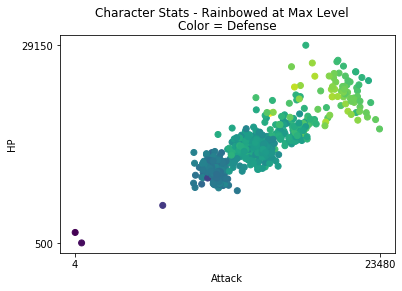

In [10]:
hp = temp_df['HP'].dropna().apply(lambda x: json.loads(x.replace("'", '"'))[-1]).astype(int)
attack = temp_df['Attack'].dropna().apply(lambda x: json.loads(x.replace("'", '"'))[-1]).astype(int)
defense = temp_df['Defense'].dropna().apply(lambda x: json.loads(x.replace("'", '"'))[-1]).astype(int)

plt.scatter(x=attack, y=hp, c=defense / defense.max())
plt.xticks([attack.min(), attack.max()])
plt.yticks([hp.min(), hp.max()])
plt.suptitle('Character Stats - Rainbowed at Max Level')
plt.title('Color = Defense')
plt.xlabel('Attack')
plt.ylabel('HP');

"""
Scatterplot of only TUR and LRs, defense is color where lighter = higher defense
Fairly minimalistic graph right now, would like to work on ticks later
""";

# Pettan Battle Cards

In [11]:
# Same number of cards in each series
pettan_df['Series'].value_counts()

Series 4    37
Series 2    37
Series 3    37
Series 1    37
Name: Series, dtype: int64

In [12]:
# fairly similar rarity distribution over the series so far
pd.DataFrame(pettan_df.groupby('Series')['Rarity'].value_counts()).unstack('Series')

Rarity                           
Series   Series 1 Series 2 Series 3 Series 4
Rarity                                      
Bronze         16       16       14       15
Gold            7        8        8        8
Platinum        2        2        2        2
Silver         12       11       13       12